In this notebook, we wish to visualise the reconstruction error of the autoencoder we've trained. We hope that training this autoencoder will help the conv-net in the second phase of the project, which is using gradient descent to transform X from a white noise image to a heightmap.

In [12]:
import lasagne
import numpy as np
import pickle
import skimage.transform
import scipy

import theano
import theano.tensor as T

from lasagne.utils import floatX

import matplotlib.pyplot as plt
%matplotlib inline

from skimage.io import imread
from skimage import filters

from lasagne.layers import *
import sys
sys.path.append("../../modules/")
import helper as hp

import train_ae

import cPickle as pickle

In [3]:
dat = np.load("train_data_minimal.npy")

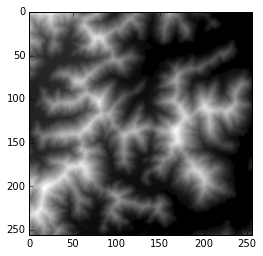

In [6]:
plt.imshow( dat[0][0], cmap="gray" )

In [10]:
net_out = train_ae.get_net({})

number of params: 240256
<lasagne.layers.input.InputLayer object at 0x11465e050>,(None, 1, 256, 256)
<lasagne.layers.noise.GaussianNoiseLayer object at 0x11465e110>,(None, 1, 256, 256)
<lasagne.layers.conv.Conv2DLayer object at 0x11465e190>,(None, 32, 254, 254)
<lasagne.layers.pool.MaxPool2DLayer object at 0x11465e150>,(None, 32, 84, 84)
<lasagne.layers.conv.Conv2DLayer object at 0x11465e4d0>,(None, 64, 82, 82)
<lasagne.layers.pool.MaxPool2DLayer object at 0x11465e1d0>,(None, 64, 27, 27)
<lasagne.layers.conv.Conv2DLayer object at 0x11465e690>,(None, 128, 25, 25)
<lasagne.layers.conv.Conv2DLayer object at 0x11465e650>,(None, 128, 23, 23)
<lasagne.layers.special.InverseLayer object at 0x11465e950>,(None, 128, 25, 25)
<lasagne.layers.special.InverseLayer object at 0x11465eb50>,(None, 64, 27, 27)
<lasagne.layers.special.InverseLayer object at 0x11465eb10>,(None, 64, 82, 82)
<lasagne.layers.special.InverseLayer object at 0x11465eb90>,(None, 32, 84, 84)
<lasagne.layers.special.InverseLayer o

In [34]:
with open("model.pkl") as f:
    set_all_param_values(net_out, pickle.load(f))

In [35]:
X = T.tensor4('X')
out_fn = theano.function([X], get_output(net_out, X))

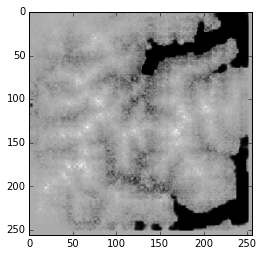

In [36]:
plt.imshow( out_fn(dat[0:1])[0][0], cmap="gray" )